In [417]:
import numpy as np
import pandas as pd

In [418]:
df = pd.read_csv("goog.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


Date: the date of each trading day.
Open: opening price of Google's stock each day
High: highest price of Google's stock on each day
Low: lowest price of Google's stock on each day
Close: closing price of Google's stock on each day
Volume: The trading volume, i.e., total number of shares of a stock on each day.

In [419]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [420]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [421]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [422]:
df["Close"]

0     794.200012
1     796.419983
2     794.559998
3     791.260010
4     789.909973
         ...    
56    845.539978
57    845.619995
58    847.200012
59    848.780029
60    852.119995
Name: Close, Length: 61, dtype: float64

In [423]:
from sklearn.preprocessing import MinMaxScaler

# that the transformed data will be scaled to be between 0 and 1
mms = MinMaxScaler(feature_range=(0,1)) 

# Transform -> df["Close"] data
# reshape(-1, 1) is used to reshape the data into a 2D array with one column
scaled_df = mms.fit_transform(df["Close"].values.reshape(-1,1)) 

In [424]:
# scaled_df

In [425]:
# (y) Dependent Variable: 'Close' price of Google's stock (target variable)

# as for time series analysis of such sequential data, we have to split the data in train test in sequennce only as stock 
# on next day depend on privious day (hence we divide in sequence directly, and not use random_state or etc)

# sequential spliting of scaled_df
#80% of my scaled_df should be-> training data
#20% remaining scaled_df -> testing data
split_index = int(len(scaled_df)*0.8)
train_data = scaled_df[:split_index]
test_data = scaled_df[split_index:]

In [426]:
train_data.size

48

In [427]:
test_data.size

13

In [428]:
#creating 3successive days stocks' price sequence for each row in training dataset
def sequence_creation(data, time_stamp=5):
    x = [] # prior 5stock price store here
    y = [] # next 6th stock price store here
    for i in range (len(data)-time_stamp):
        x.append( data[i:i+time_stamp, 0] ) #all 5values s ored
        y.append( data[i+time_stamp, 0] )   #6th value will store
    return np.array(x),np.array(y)

In [429]:
# x_train, y_train

In [430]:
x_train, y_train = sequence_creation(train_data)
# x_train, y_train
x_test, y_test = sequence_creation(test_data)
# x_test, y_test

print("x_train, y_train length")
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

x_train, y_train length
43
43
8
8


In [431]:
# LSTM RNN model creation
# LSTM => each unit or cell is responsible for capturing and remembering patterns in the sequential data. 
# More units allow the LSTM layer to learn more complex patterns in the data. 
# return_sequences is set to True, the LSTM layer will return the output for each timestep in the sequence.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 5, 50)             10400     
                                                                 
 lstm_41 (LSTM)              (None, 50)                20200     
                                                                 
 dense_18 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [432]:
model.fit(x_train,y_train,epochs=50,batch_size=4,verbose=1) #batch_size=4

Epoch 1/50
 1/11 [=>............................] - ETA: 0s - loss: 0.2769 - mae: 0.4837

C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 [==============================] - 0s 44ms/step - loss: 0.1471 - mae: 0.3386
Epoch 2/50
11/11 [==============================] - 0s 45ms/step - loss: 0.0350 - mae: 0.1435
Epoch 3/50
11/11 [==============================] - 1s 49ms/step - loss: 0.0290 - mae: 0.1345
Epoch 4/50
11/11 [==============================] - 0s 45ms/step - loss: 0.0246 - mae: 0.1302
Epoch 5/50
11/11 [==============================] - 0s 45ms/step - loss: 0.0254 - mae: 0.1231
Epoch 6/50
11/11 [==============================] - 0s 43ms/step - loss: 0.0254 - mae: 0.1322
Epoch 7/50
11/11 [==============================] - 0s 45ms/step - loss: 0.0216 - mae: 0.1204
Epoch 8/50
11/11 [==============================] - 0s 42ms/step - loss: 0.0224 - mae: 0.1171
Epoch 9/50
11/11 [==============================] - 0s 44ms/step - loss: 0.0221 - mae: 0.1166
Epoch 10/50
11/11 [==============================] - 0s 44ms/step - loss: 0.0216 - mae: 0.1169
Epoch 11/50
11/11 [==============================] - 0s 41ms/step - lo

In [433]:
y_predict = model.predict(x_test)
# transform back
y_predict = mms.inverse_transform(y_predict)
y_test = mms.inverse_transform(y_test.reshape(-1,1))


1/1 [==============================] - 0s 31ms/step


### Evaluation 

In [434]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  12.523612906249994
MSE:  160.92441193263943
RMSE:  12.685598603638672


In [435]:
# y_test,y_predict

In [436]:
# x_train, y_train

### Prediction: we will use Test dataset record to check prediction value (record no. 4)

In [437]:
test_row = x_test[4]
test_row

array([0.74831849, 0.79140719, 0.8326276 , 0.88953927, 0.91805706])

In [438]:
# LSTM layer expects input data in a 3-dimensional shape (batch_size, time_steps, features)
x_sample = test_row.reshape(1, test_row.shape[0], 1)

In [441]:
y_test[4]

array([845.619995])

In [439]:
predicted_price = model.predict(x_sample)
predicted_price = mms.inverse_transform(predicted_price)
print('Predicted price for the next day: ', predicted_price)

1/1 [==============================] - 0s 29ms/step
Predicted price for the next day:  [[835.5566]]


C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


### Time series Graph

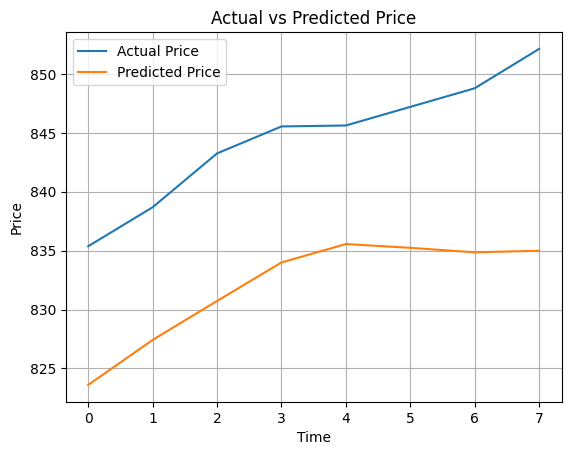

In [440]:
import matplotlib.pyplot as plt

# Plotting the original test data
plt.plot(y_test, label='Actual Price')

# Plotting the predicted prices
plt.plot(y_predict, label='Predicted Price')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()